In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv('data_modified.csv', low_memory=False)
df = df.drop(columns=['Unnamed: 0', 'Description', 'Reference number', 'Location', 'id', 'Functions'])
df = df.dropna()
print(len(df))
df.head()

46090


,Bracelet material,Brand,Case diameter,Case material,Condition,Dial,Gender,Model,Movement,Scope of delivery,...,Chronograph,GMT,Tachymeter,Moon phase,Annual calendar,Perpetual calendar,Tourbillon,Flyback,Alarm,Country
0,Steel,Bulgari,41.0,Steel,New,Black,Men's watch/Unisex,Octo,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,United States of America
1,Steel,Tissot,39.0,Steel,New,Mother of pearl,Men's watch/Unisex,PR 100,Quartz,"Original box, no original papers",...,0,0,0,0,0,0,0,0,0,Japan
2,Leather,Mido,41.0,Steel,New,Silver,Men's watch/Unisex,Belluna,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,Japan
3,Steel,Mido,42.0,Steel,New,Black,Men's watch/Unisex,Multifort GMT,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,Japan
4,Leather,Seiko,42.0,Steel,Unworn,Black,Men's watch/Unisex,Kinetic,Quartz,"Original box, original papers",...,0,0,0,0,0,0,0,0,0,Japan


# 1 Exploratory analysis
## 1.1 Price
The mean price of a watch on Chrono24 is \\$12480 with a median of \\$5650. <br>
Watches start at \\$30 and range up to \\$921236. <br>
As shown in the histogram, the distribution of prices is heavely skewed to the left. Is is probably a good idea to transform the dependend variable. A log-transformation will get the distribution closer to a normal distribution.

In [4]:
df.price.describe()

count     46090.000000
mean      12479.643979
std       26859.698690
min          30.000000
25%        2309.000000
50%        5650.000000
75%       13008.250000
max      921236.000000
Name: price, dtype: float64

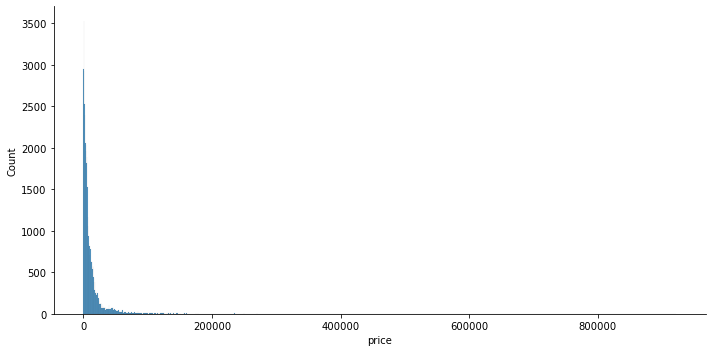

In [5]:
sns.displot(data=df, x=df['price'], kind='hist', fill=True, height=5, aspect=2)

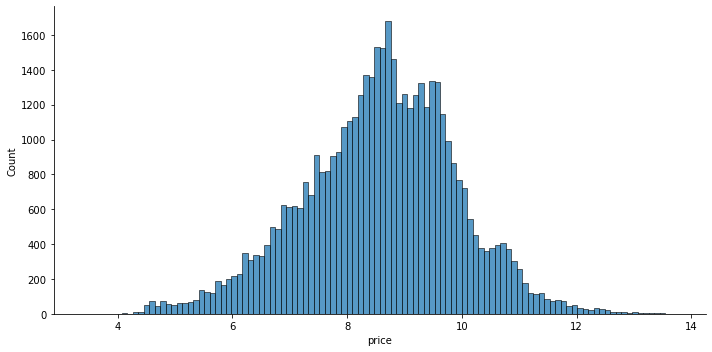

In [6]:
sns.displot(data=df, x=np.log(df['price']), kind='hist', fill=True, height=5, aspect=2)

## 1.2 Brands
When sorting the brands by highest average price, we can see a few very familiar names. <br> 
Two members of the so called 'Holy Trinity': Audemars Piguet and Patek Phillipe with average prices in the sixty-thousands. <br>
The most famous German watchmaker A. Lange & Söhne with a mean price of \\$55695 and the watch making legend F.P. Journe with an average price of \\$102912 make the list as well. <br>
The ranking is topped by Richard Mille, famous for their ridiculously expensive watches and celebrity endorsements with a mean selling price of \\$316478.

In [5]:
df.groupby('Brand')['price'].mean().sort_values(ascending=False)[0:10]

Brand
Richard Mille       316478.533333
Greubel Forsey      293750.000000
F.P.Journe          102912.000000
De Bethune          101631.666667
Patek Philippe       68669.957155
Audemars Piguet      60308.138194
A. Lange & Söhne     55694.768212
Roger Dubuis         45161.755556
HYT                  44115.000000
Urwerk               33854.000000
Name: price, dtype: float64

## 1.3 Condition
As expected, the condition of the watch is an important factor for its selling price. <br>
In general, the better the condition the higher the asking price. <br>
But there is one exception to this rule: unworn watches, or watches in a 'very good' condition sell for higher prices than watches which are classified as 'New'. <br>
This seems unintuitive but can be explained with a bit of knowledge in the sales process of luxury watches. Many of the most prestigious watchmakers (e.g. Rolex, Audemars Piguet, Patek Phillipe) sell their products exclusively through their network of authorized dealers (AD). These sellers are under a number of restrictions to protect the brand image. For one, they are usually required to only sell watches in-person, which means ADs cant sell these watches online on Chrono24. Secondly, many ADs are required to unpack the watches at the time of sale and remove all protective material.
This has the following effect: customers are only able to buy these watches online from resellers ('gray dealers') and these resellers have no access to watches that can classify as 'New'. <br>
The distribution plot shows that 'New' group contains a lot more affordable watches compared to the 'Unworn' and 'Very good' groups.

In [6]:
df.groupby('Condition')['price'].mean().sort_values(ascending=False)

Condition
Unworn       18296.950617
Very good    13425.638004
New          10727.698780
Good          8571.116790
Fair          7161.645161
Poor          3964.680000
Name: price, dtype: float64

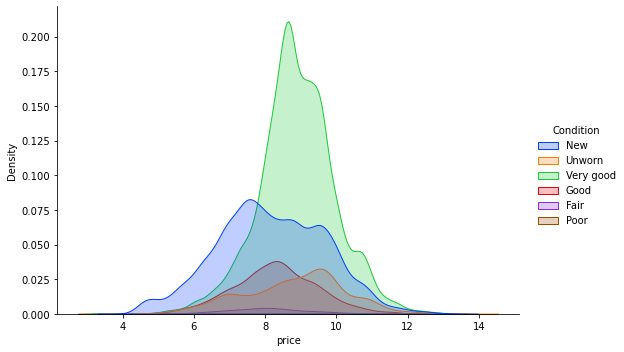

In [7]:
sns.displot(data=df, x=np.log(df['price']), hue='Condition', kind='kde', fill=True, palette=sns.color_palette('bright')[:6], height=5, aspect=1.5)

## 1.4 Seller
The effect of seller is self explanatory. <br>
Professional sellers are more trustworthy and may offer a warranty. Most people will prefer to handle very expensive purchases through professional dealers. <br>
As a result, the average selling price of a professional seller is more than twice as high compared to a private seller.

In [8]:
df.groupby('private_seller')['price'].mean().sort_values(ascending=False)

private_seller
0.0    13142.157717
1.0     6164.265082
Name: price, dtype: float64

## 1.5 Dial
There are some price differences regarding the dial color of a watch. <br>
Transparent dials are especially expensive, trading almost 500% above the average. Transparent dials are often found in top of the line concept watches, showing off expensive complications and high-end finishing. <br>
Interestingly Brown and Purple command a significant premium as well. There might certain, very expensive models in this particular color that I am unaware of. <br>
Bordeaux and Red are seemingly out of style and make the bottom of the list.
Black and Silver are the most common dials colors and both have mean prices of approximately \\$10800. <br>
Blue is the third most common dial color and has a 50\% price premium compared to black and silver. Blue has been the trend color in watches for the last few years with watches like the blue Patek Philippe Nautilus, Rolex Milgauss and Vacheron Constantin Overseas being extremely sought after. <br>
In 2021 the biggest names in the industry started to push for Green as the next big thing and while still uncommon on Chrono24, green dials already sell for 60\% more than the black and silver baseline.

In [9]:
df.groupby('Dial')['price'].mean().sort_values(ascending=False)

Dial
Transparent        62492.261950
Brown              24788.296154
Purple             19513.273810
Green              16193.660184
Blue               14958.208700
Pink               14667.141328
Grey               13171.372353
Gold               12665.963039
Yellow             11891.481707
White              10819.062014
Champagne          10797.716226
Black              10759.912666
Silver             10397.057008
Mother of pearl     9835.585507
Bronze              9659.761905
Orange              9271.402439
Red                 7609.350000
Bordeaux            7272.459459
Name: price, dtype: float64

## 1.6 Materials
As one would expect the prices of different case and bracelet materials are roughly equivalent to their material costs. Precious metals are at the top of the list while plastic is at the bottom. <br>
The difference between rose- and white gold on the one hand and yellow gold on the other is quite interesting. Cases made out of the former are almost twice as expensive compared to the latter. The difference in bracelets is even larger with white gold bracelets being 70% more expensive and rose gold bracelets being 160% more expensive than yellow gold bracelets. <br>
It might look strange that silver is almost at the bottom. No major watch maker has used silver as a material in the last 50 plus years, so almost all silver watches on Chrono24 will be very old and thus cheaper.

In [10]:
df.groupby('Case material')['price'].mean().sort_values(ascending=False)

Case material
Platinum       88706.178451
Carbon         50218.425837
Rose gold      38875.204502
White gold     35842.354883
Yellow gold    21281.816950
Other          19371.400000
Titanium       14447.594793
Ceramic        13892.339623
Gold/Steel      9889.750661
Steel           7862.139490
Bronze          6012.726852
Silver          3553.909910
Plastic         1798.708955
Aluminum        1714.216216
Name: price, dtype: float64

In [11]:
df.groupby('Bracelet material')['price'].mean().sort_values(ascending=False)

Bracelet material
Platinum       111200.527473
Rose gold       65369.574043
White gold      42233.591981
Yellow gold     25143.155664
Rubber          16771.825749
Ceramic         12801.169355
Leather         10954.284318
Gold/Steel      10594.275007
Textile          9905.497326
Steel            9538.326315
Titanium         7890.582301
Silver           5215.888889
Aluminium        1668.000000
Name: price, dtype: float64

## 1.7 Size and Gender
The price of a watch increases with its case diameter up to a maximum of 40mm. This does not come as a surprise as 40mm is currently the standard size of male and unisex watches. <br>
The average price peaks at 40mm and decreases for larger sizes. At 50mm and 60mm, there are two additional peaks, altough with a very high variance. <br>
Womens watches are only twice as expensive compared to Men's watches, a result of their generally much smaller size. <br>

In [12]:
## drop watches under 14mm, these are most likely wrong values
df = df[df['Case diameter'] > 13]

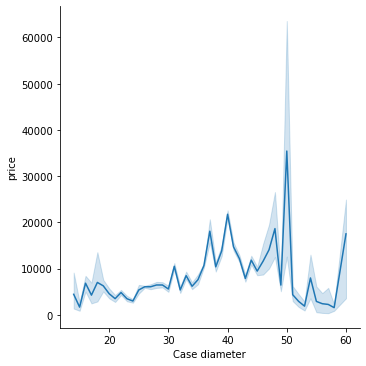

In [13]:
sns.relplot(x="Case diameter", y="price", kind="line", data=df)

In [14]:
df['Diameter_group'] = 0
for i in range(0, 24):
    start = 14 + i*2
    end = start + 1
    df.loc[(df['Case diameter'] >= start) & (df['Case diameter'] <= end), 'Diameter_group'] = '{}-{}'.format(start, end)

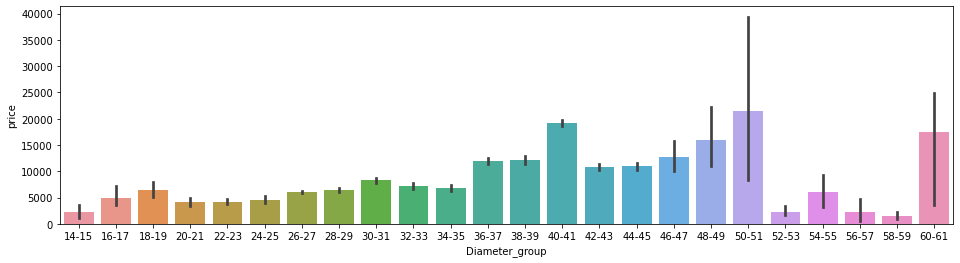

In [15]:
plt.figure(figsize=(16,4))
sns.barplot(x="Diameter_group", y="price", data=df.sort_values('Case diameter'))
plt.show()

In [16]:
df.groupby('Gender')['price'].mean().sort_values(ascending=False)

Gender
Men's watch/Unisex    13535.409959
Women's watch          7153.410733
Name: price, dtype: float64

## 1.8 Year of Production
The price of a watch generally decreases with age but there are two exceptions. Watches from the World War 2 era sell for very high prices. Secondly, the average price of watches from 2021 is comparable to twenty year old watches. This comes back to the sales process outlined in XX. 

In [17]:
## drop watches made before 1900, these are most likely wrong values
df = df[df["Year of production"] > 1900]

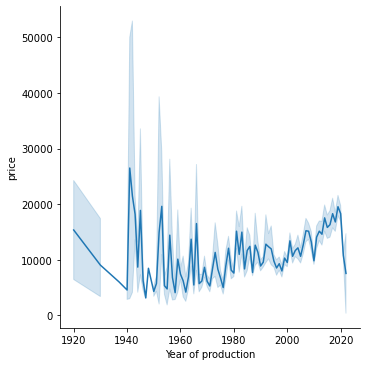

In [18]:
sns.relplot(x="Year of production", y="price", kind="line", data=df)

In [19]:
df['Decade'] = 0
for i in range(190, 220):
    start = i * 10
    end = start + 10
    df.loc[(df['Year of production'] >= start) & (df['Year of production'] < end), 'Decade'] = '{}s'.format(start)

<AxesSubplot:xlabel='Decade', ylabel='price'>

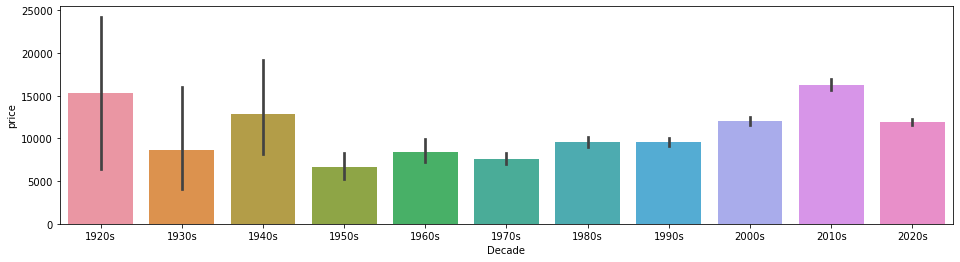

In [20]:
plt.figure(figsize=(16,4))
sns.barplot(x="Decade", y="price", data=df.sort_values('Year of production'))

## 1.9 Movement
Watches with a Quartz movement are by far the most affordable. This is to be expected, since their production costs are only a fraction of a mechanical movement. The segment of quartz watches is dominated by low price fashion watches and there are only a handful of high-end manufacturers like Grand Seiko working with quartz movements. <br>
It might seem strange that a hand-wound movement is almost \\$5000 more expensive compared to an autonatically wound movement. The reason for this is that manually wound movements are almost exclusively used in high-end, super thin dress watches of the most prestigious watch makers.

In [21]:
df.groupby('Movement')['price'].mean().sort_values(ascending=False)

Movement
Manual winding    18245.503021
Automatic         13764.442936
Quartz             3586.709943
Name: price, dtype: float64

## 1.10 Scope of Delivery
Every watch collector knows that its important to keep the box and papers. <br>
A watch without papers might be stolen or even a fake. <br>
This shows up very clearly in the prices. While the original box is worth an additional 20%, having the corresponding papers increases the sale price by 77%. There are of course interdependencies, since owners are also more likely to keep box and papers for very expensive watches. 

In [22]:
df.groupby('Scope of delivery')['price'].mean().sort_values(ascending=False)

Scope of delivery
Original box, original papers          14250.705308
Original papers, no original box       14181.185560
Original box, no original papers        9569.479060
No original box, no original papers     8036.231294
Name: price, dtype: float64

## 1.11 Crystal
The price effect of the watch crystal is very straight forward. <br>
With very few exceptions, all high-end watches use Sapphire crystals. <br>
With the Omega Speedmaster as a notable exception, plexiglass is usually found in vintage models from the 80s and earlier. <br>
Mineral glass is only used in more affordable fashion watches and very old models from the 60s and earlier.

In [23]:
df.groupby('Crystal')['price'].mean().sort_values(ascending=False)

Crystal
Sapphire crystal    13314.442280
Plexiglass           7487.665214
Mineral Glass        1397.666858
Name: price, dtype: float64

## 1.12 Complications
The price of a complication depends on its difficulty. <br> 
Simple and more common complications like a date function or a second time zone command a premium of 12% and 45% respectively.<br>
Very complicated and rare functions like a perpetual calendar or a flyback chronograph increase prices by 360% and 418%. <br>
The king of all complications is the Tourbillon and the average watch with this complication costs a staggering \\$93600.

In [24]:
functions = ['Date', 'Weekday', 'Month', 'Year', 'Chronograph', 'GMT', 
             'Tachymeter', 'Moon phase', 'Annual calendar', 'Perpetual calendar',
             'Tourbillon', 'Flyback', 'Alarm']
    
functions_overview = pd.DataFrame(columns=functions)

for i in [0,1]:
    values = []
    for function in functions:
        v = df.loc[df['Movement'].isin(['Manual winding', 'Automatic']) & df[function] == i, 'price'].mean()
        values.append(v)
    functions_overview.loc[i] = values

functions_overview

,Date,Weekday,Month,Year,Chronograph,GMT,Tachymeter,Moon phase,Annual calendar,Perpetual calendar,Tourbillon,Flyback,Alarm
0,11622.471265,12407.783430,12236.963896,12419.118345,11096.746641,12167.754502,12297.581657,11973.902933,12287.460345,12189.623194,12275.366718,12312.330141,12475.636468
1,13152.890327,14618.943175,26246.468788,15446.759406,18787.725556,17740.001142,18036.599469,39953.946556,39033.809384,44250.117647,93597.991597,51406.941176,18629.297297


In [25]:
df = df.dropna()
df.head()

,Bracelet material,Brand,Case diameter,Case material,Condition,Dial,Gender,Model,Movement,Scope of delivery,...,Tachymeter,Moon phase,Annual calendar,Perpetual calendar,Tourbillon,Flyback,Alarm,Country,Diameter_group,Decade
0,Steel,Bulgari,41.0,Steel,New,Black,Men's watch/Unisex,Octo,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,United States of America,40-41,2020s
1,Steel,Tissot,39.0,Steel,New,Mother of pearl,Men's watch/Unisex,PR 100,Quartz,"Original box, no original papers",...,0,0,0,0,0,0,0,Japan,38-39,2020s
2,Leather,Mido,41.0,Steel,New,Silver,Men's watch/Unisex,Belluna,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,Japan,40-41,2020s
3,Steel,Mido,42.0,Steel,New,Black,Men's watch/Unisex,Multifort GMT,Automatic,"Original box, original papers",...,0,0,0,0,0,0,0,Japan,42-43,2020s
4,Leather,Seiko,42.0,Steel,Unworn,Black,Men's watch/Unisex,Kinetic,Quartz,"Original box, original papers",...,0,0,0,0,0,0,0,Japan,42-43,2020s


# 2 Price Regression

In [45]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from category_encoders.binary import BinaryEncoder
from category_encoders.target_encoder import TargetEncoder
from catboost import CatBoostRegressor, Pool
import time

In [28]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [27]:
categorical_var = ['Bracelet material', 'Brand', 'Case material',
       'Condition', 'Dial', 'Gender', 'Model', 'Movement', 'Scope of delivery',
       'private_seller', 'Crystal', 'Decade', 'Diameter_group', 'Country']

## 2.1 First test of different classifiers
In the first step, the categorical data has to be numerically encoded. <br>
The default solution is a onehot dummy encoding. As a downside, this will result in a very large number of variables, making the regression much slower. <br>
Binary and Target encoding are two viable alternatives resulting in significantly less variables. On the flipside, both methods will have some information loss compared to dummy encoding. In addition, linear regression models will have some problems with binary encoding, as they do not natively take variable interactions into account. With tree based models this problem is alleviated. <br>
I test out three regression models:
1. A simple linear regression model
2. A linear regression model with regularization
3. A decision-tree ensemble model (Random Forest)
<br>
<br>
Out of the gate, the onehot encoded models have a very good performance. The models explain roughly 91% of the variance in watch prices. While the linear models are reasonably fast, the random forest regression takes over 4 minutes. <br>
As expected, the linear models perform very badly with binary encoded features, with R² falling to 60%. The Random Forest Model performs only marginally worse but is 10 times faster than before. <br>
Target encoding offers the best balance between accuracy and performance. The speed of all three models doubles compared to binary encoding. While the R² of the linear models (86%) is still lower compared to onehot encoding, the Random Forest Models shows the highest accuracy yet with an R² of over 92%.

In [30]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])

transformer = ColumnTransformer([
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_var),
    ], remainder='passthrough')


transformers = [
    ColumnTransformer([('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_var)], remainder='passthrough'),
    ColumnTransformer([('binary', BinaryEncoder(), categorical_var)], remainder='passthrough'),
    ColumnTransformer([('target', TargetEncoder(), categorical_var)], remainder='passthrough'),
]

models = [
    LinearRegression(),
    Ridge(random_state=13),
    RandomForestRegressor(random_state=13)
]


for transformer in transformers:
    print(transformer.transformers[0][0])
    for model in models:
        start_time = time.time()
        pipe = Pipeline([('tf', transformer), ('model', model)])
        scores = cross_val_score(pipe, X, y, cv=5, n_jobs=5)
        print('{}. Score: {}. Time: {}s'.format(model, np.mean(scores), time.time() - start_time))
    print()

onehot
LinearRegression(). Score: 0.9104725960573994. Time: 4.6171979904174805s
Ridge(random_state=13). Score: 0.9119378152861796. Time: 0.4790327548980713s
RandomForestRegressor(random_state=13). Score: 0.9178676008415365. Time: 242.4446930885315s

binary
LinearRegression(). Score: 0.605103068218687. Time: 1.5022521018981934s
Ridge(random_state=13). Score: 0.6050997872025551. Time: 1.3432209491729736s
RandomForestRegressor(random_state=13). Score: 0.9017556061777985. Time: 23.66302490234375s

target
LinearRegression(). Score: 0.8613299304404158. Time: 0.5921528339385986s
Ridge(random_state=13). Score: 0.8613253535691582. Time: 0.5440030097961426s
RandomForestRegressor(random_state=13). Score: 0.926502884093648. Time: 12.1203293800354s

Wall time: 4min 47s


## 2.2 Gradient Boosting
It might be possible to increase accuracy even more with gradient boosting. <br>
I use the CatBoost algorithm as an implementation of gradient boosting. The catboost package comes with two very useful features. First of all it supports calculation on GPU natively, which significantly speeds of calculation. Secondly, encoding is handled internally and allows for easy output of feature importance. <br>
<br>
After 2000 iterations CatBoost achieves an accuracy of 90%. <br>
As expected, the brand and model are by far the most important features to determine the price of a watch. Most brands have a certain price region in which they operate: for example Seiko in the entry level region below \\$1000, Rolex and Omega in the upper middle class between \\$5000 and \\$10000 and Patek Phillipe in the high end above \\$30000. <br>
The specific model already subsumes a lot of information from the other features. One model will usually only have one or very few different values for each feature. For example, a Rolex Day-Date will always have an automatic movement, a gold or platinum case and a perpetual calendar complication. <br>
This explains why most complications have a low feature importance, since they are usually very model specific. 

In [32]:
df['private_seller'] = df['private_seller'].astype(int)

In [61]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])


model = CatBoostRegressor(cat_features=categorical_var, iterations=2000, random_state=13, task_type='GPU', devices='0:1', early_stopping_rounds=10, verbose=False)


np.mean(cross_val_score(model, X, y, cv=5, n_jobs=1))

Wall time: 5min 6s


0.8954716431936014

Wall time: 492 ms


<AxesSubplot:xlabel='feature', ylabel='importance'>

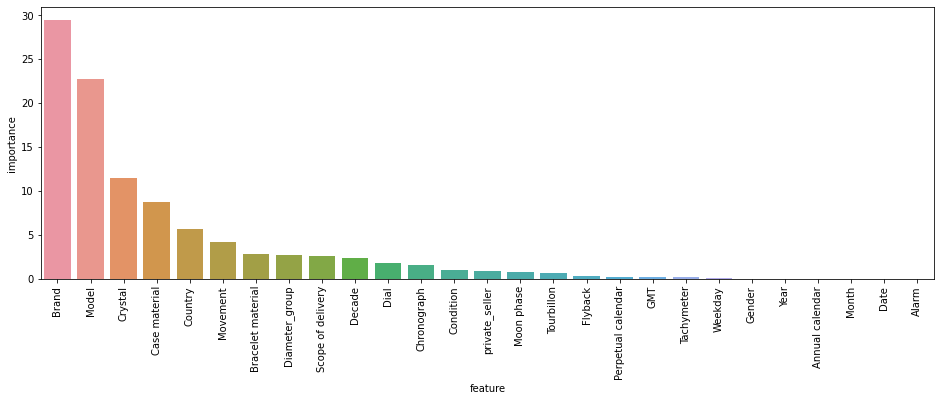

In [60]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)
pool = Pool(X_train, label=y_train, cat_features=categorical_var)
fi = model.get_feature_importance(pool)

df_fi = pd.DataFrame({
    'feature': X.columns,
    'importance': fi
})

plt.figure(figsize=(16,5))
plt.xticks(rotation=90)
sns.barplot(x='feature', y='importance', data=df_fi.sort_values('importance', ascending=False))

## 2.3 Hyperparameter tuning for Random Forest
The random forest regression has delivered the best results so far. <br>
I try to optimize the model by tuning the hyperparameters. Since the model takes a fairly long time to run, I use a randomized search grid. <br>
With the optimized parameters, the model improves only slightly by 0.02%. The base parameters seem to be very close to ideal already.

In [32]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])

params = [
    {'model__max_depth': [10, 50, 100, None],
     'model__max_features': ['auto', 'log2'],
     'model__min_samples_leaf': [1, 2],
     'model__min_samples_split': [2, 5, 10],
     'model__n_estimators': [100, 200, 500, 1000]}]


transformer = ColumnTransformer([
        ('cat', TargetEncoder(), categorical_var),
    ], remainder='passthrough')


pipe = Pipeline([('tf', transformer), ('model',RandomForestRegressor(random_state=13))])

grid = RandomizedSearchCV(estimator=pipe,
             param_distributions=params, n_jobs=5, n_iter=100, cv=3, verbose=1, random_state=13)

grid.fit(X, y)

print(grid.best_params_)
print(grid.best_score_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'model__n_estimators': 1000, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'auto', 'model__max_depth': 50}
0.9225235672362465
Wall time: 22min 4s


In [34]:
%%time

X = df[categorical_var + functions]
y = np.log(df['price'])

transformer = ColumnTransformer([
        ('cat', TargetEncoder(), categorical_var),
    ], remainder='passthrough')

pipe = Pipeline([('tf', transformer), ('model',RandomForestRegressor(random_state=13, 
                                                                     n_estimators=100, 
                                                                     min_samples_split=2, 
                                                                     min_samples_leaf=1, 
                                                                     max_features='log2', 
                                                                     max_depth=50))])

np.mean(cross_val_score(pipe, X, y, cv=5, n_jobs=5))

Wall time: 4.81 s


0.9267709023731487